In [8]:
import numpy as np
import pandas as pd
import missingno as mi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl

pd.options.display.float_format = '{:,.2f}'.format

xl = pd.ExcelFile("dadosqca.xlsx")
xl.sheet_names

['Brutos', 'Fuzzy']

In [9]:
df = xl.parse("Fuzzy")#, index_col='CASOS')
# Viewing dimensions
print(df.shape)
print(df.dtypes)

(90, 8)
FsCD          float64
FsLEG         float64
FsREC         float64
FsS_INC       float64
FsT_INC       float64
TEC             int64
RESULT          int64
Unnamed: 7    float64
dtype: object


In [10]:
# Data type of features
outputs = ['RESULT']
inputs = ['FsCD', 'FsLEG', 'FsREC', 'FsS_INC', 'FsT_INC', 'TEC']
df[list(outputs)] = df[list(outputs)].astype(str)
df[list(inputs)] = df[list(inputs)].astype(float)
print(df.dtypes)
df.describe()

FsCD          float64
FsLEG         float64
FsREC         float64
FsS_INC       float64
FsT_INC       float64
TEC           float64
RESULT         object
Unnamed: 7    float64
dtype: object


FsCD  FsLEG  FsREC  FsS_INC  FsT_INC   TEC  Unnamed: 7
count 90.00  90.00  90.00    90.00    90.00 90.00        0.00
mean   0.50   0.55   0.50     0.53     0.47  0.62         NaN
std    0.31   0.38   0.31     0.37     0.34  0.49         NaN
min    0.00   0.00   0.00     0.00     0.00  0.00         NaN
25%    0.31   0.29   0.27     0.15     0.12  0.00         NaN
50%    0.50   0.50   0.50     0.50     0.50  1.00         NaN
75%    0.74   1.00   0.69     1.00     0.70  1.00         NaN
max    1.00   1.00   1.00     1.00     1.00  1.00         NaN

In [11]:
dabl.clean(df, verbose=2).head(2)

Detected feature types:
continuous      5
dirty_float     0
low_card_int    0
categorical     2
date            0
free_string     0
useless         1
dtype: int64


FsCD  FsLEG  FsREC  FsS_INC  FsT_INC  TEC RESULT
0  0.04   0.20   0.00     0.15     0.25  0.0      1
1  0.14   0.53   0.31     0.50     0.25  0.0      1

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("exploratory analysis.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Importing 
import sweetviz as sv
# Analyzing & Display the
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html('graficos univariados.html')

                                             |          | [  0%]   00:00 -> (? left)

Report graficos univariados.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (90, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
   

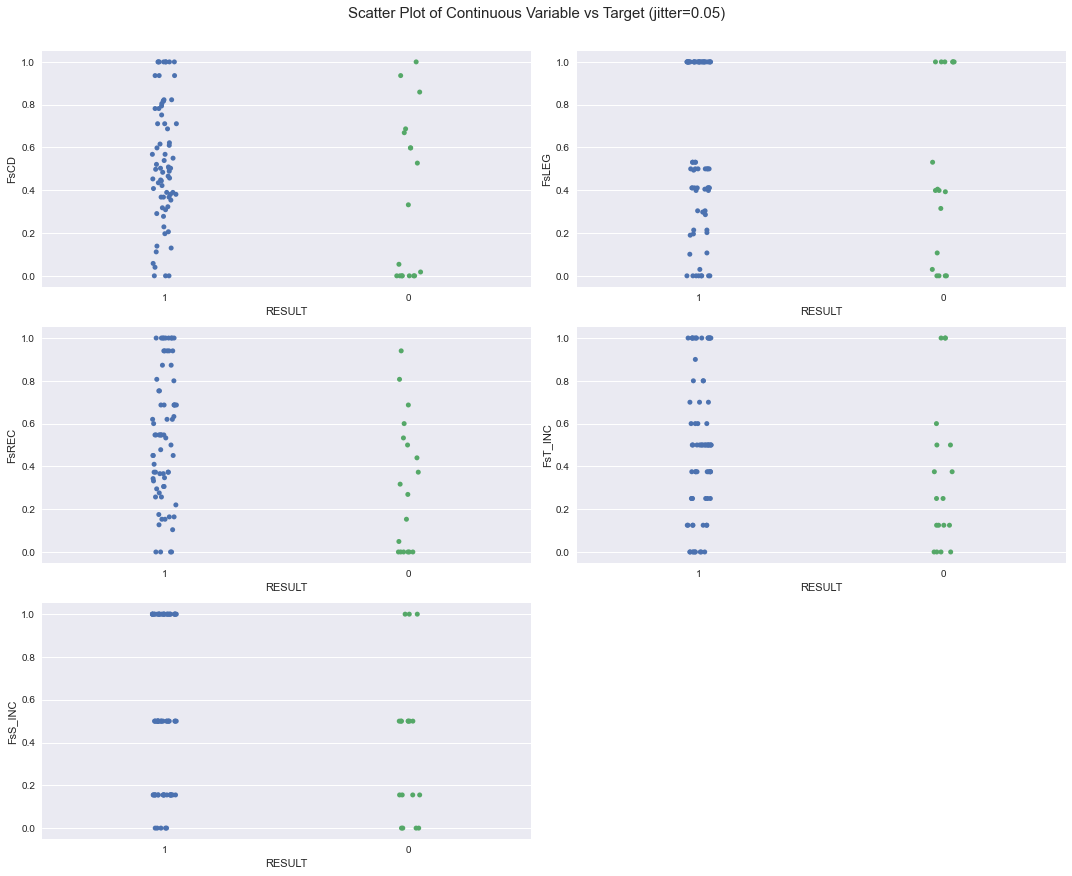

Using Lowess Smoothing. This might take a few minutes for large data sets...
Total Number of Scatter Plots = 15


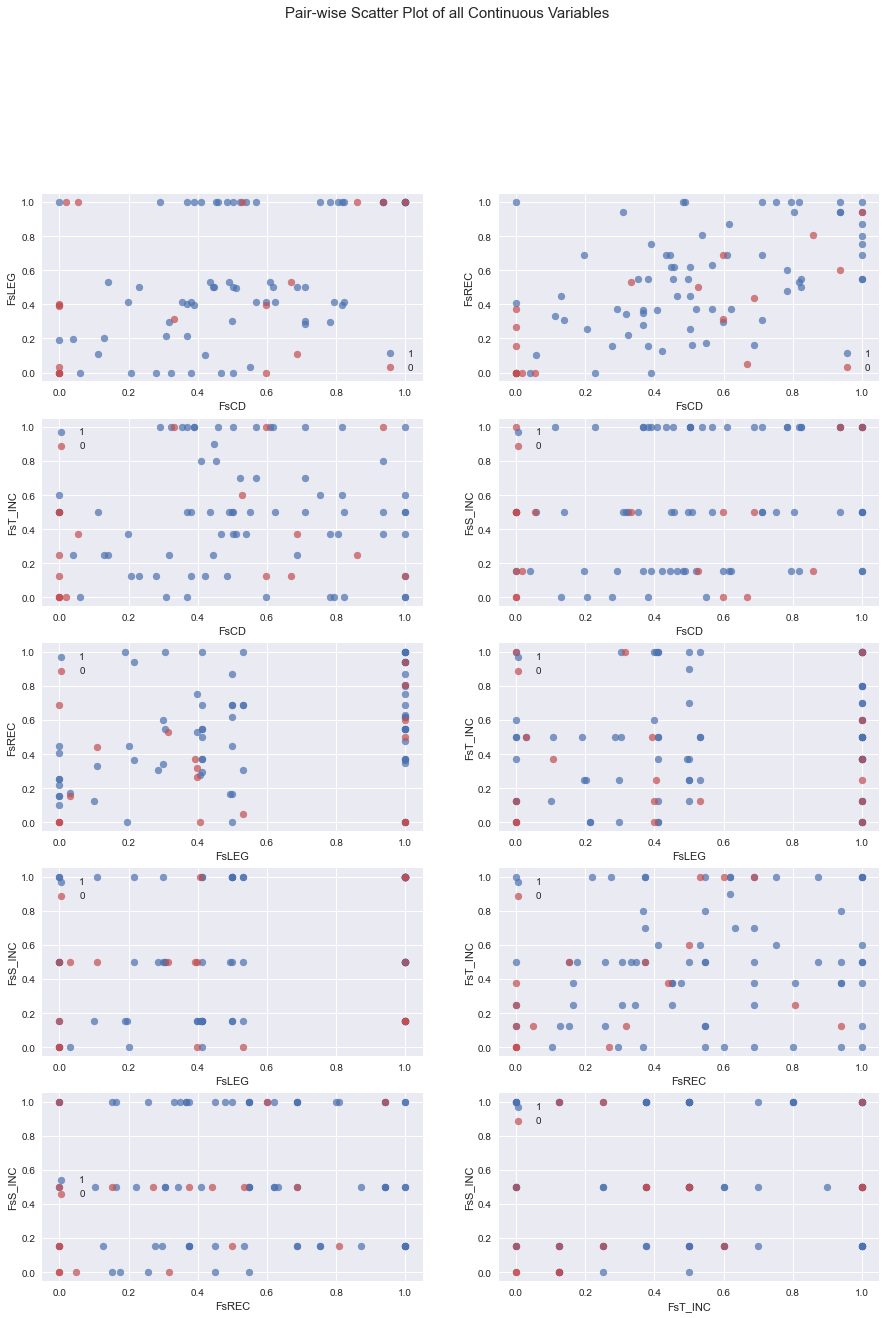

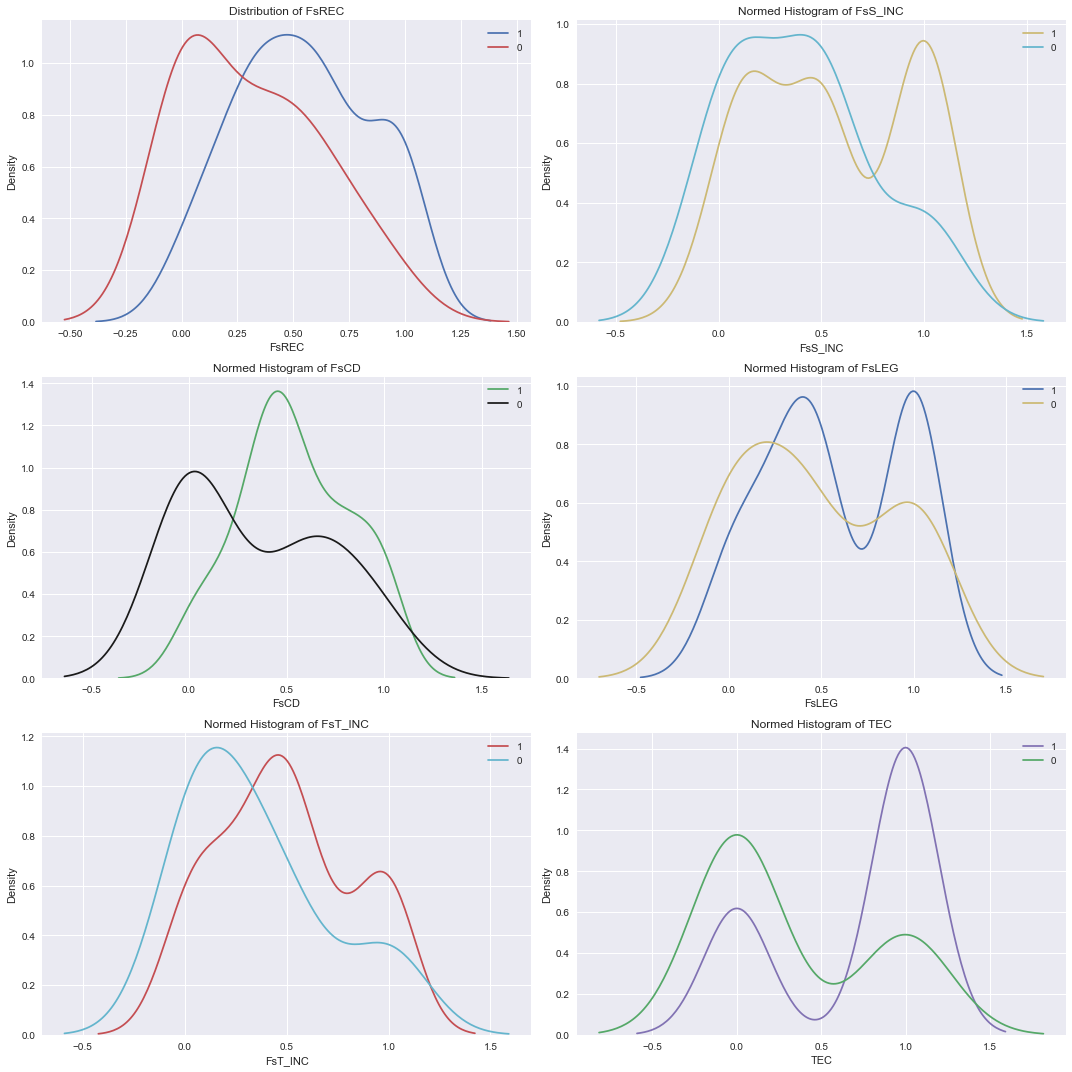

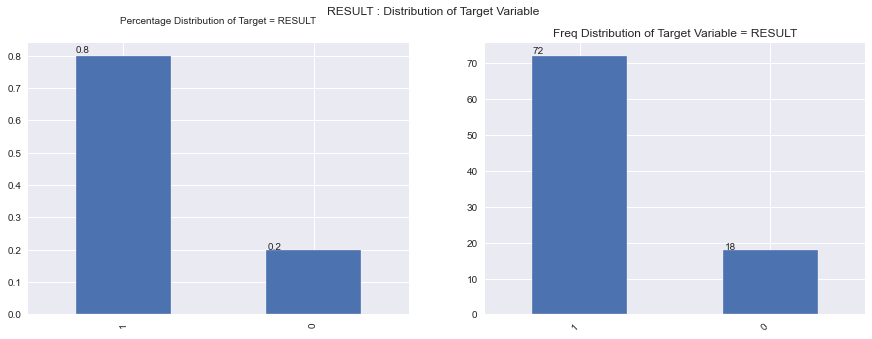

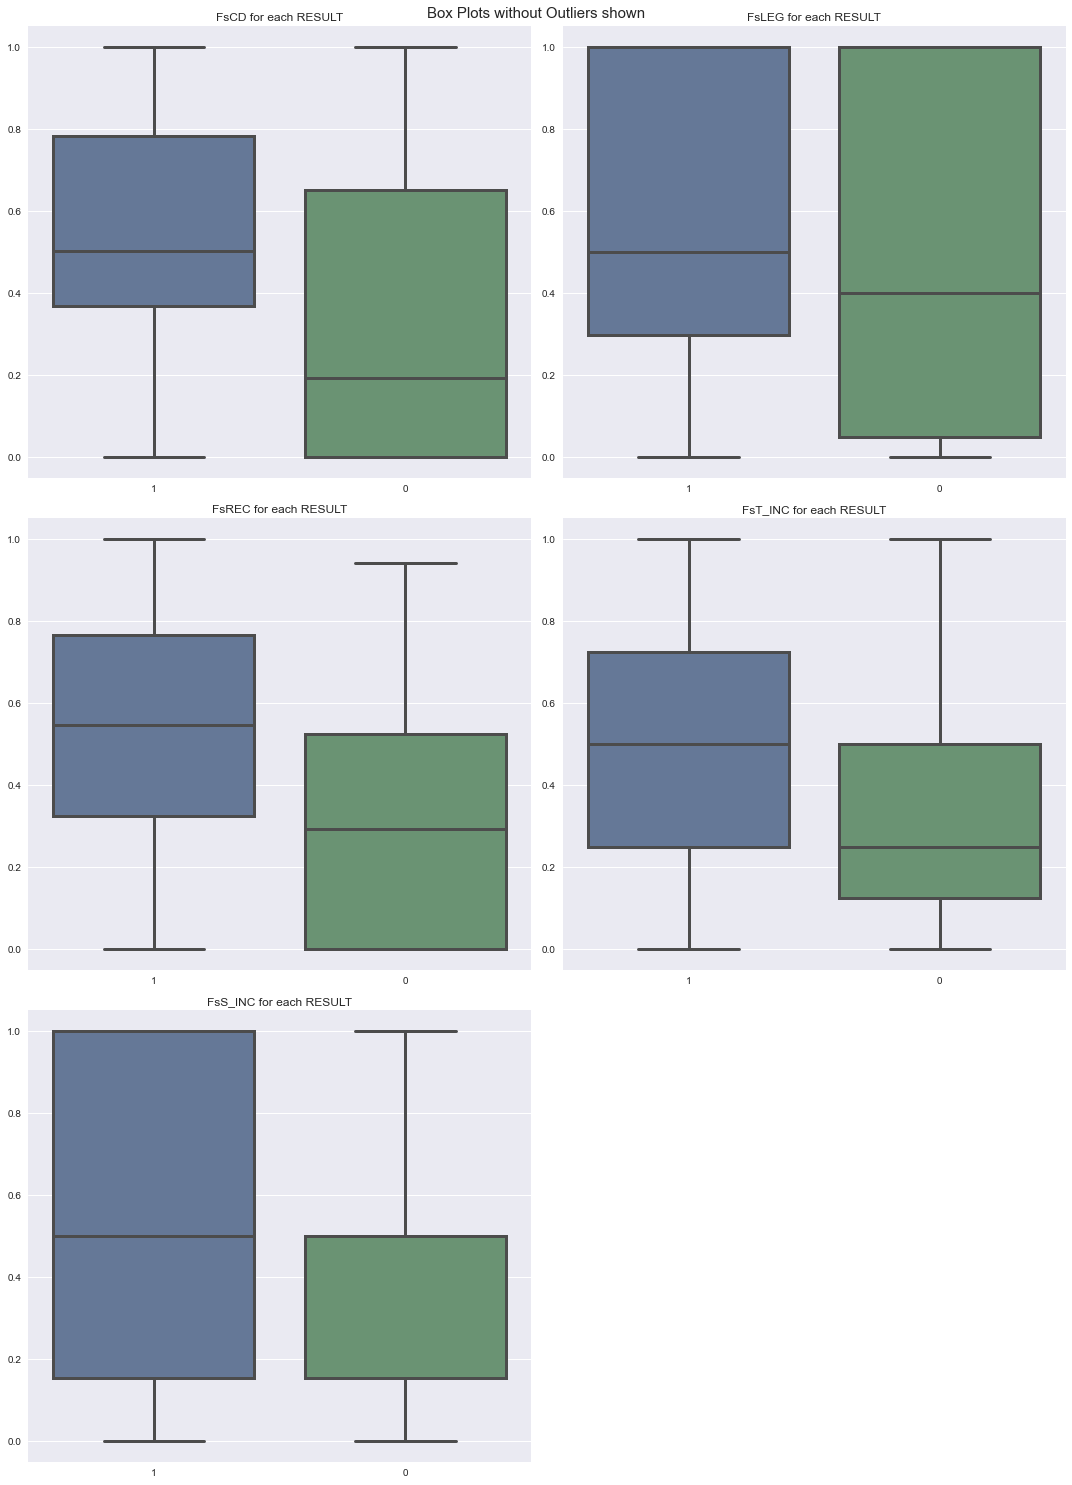

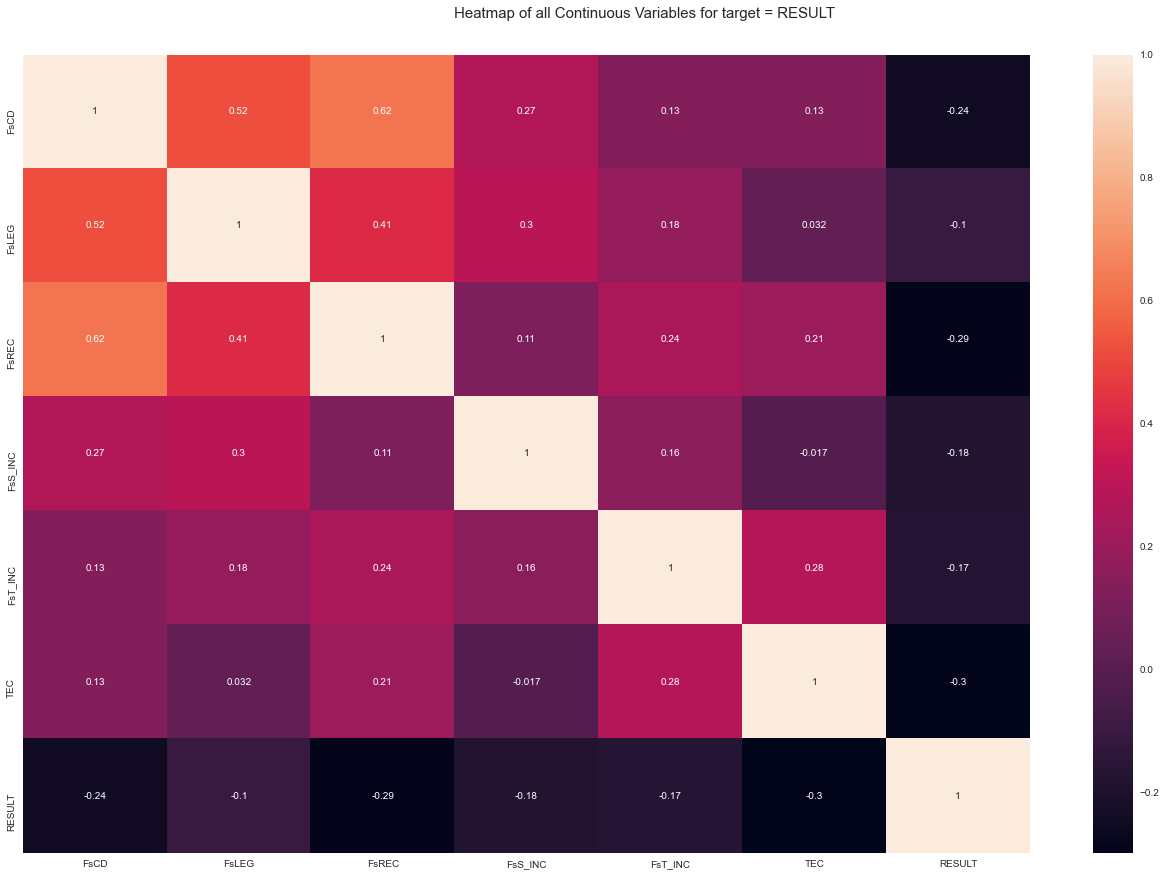

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 4.802

 ###################### VISUALIZATION Completed ########################


In [14]:
# Importing 
from autoviz.AutoViz_Class import AutoViz_Class
# Analyzing & Display the report
AV = AutoViz_Class()
dft = AV.AutoViz(filename='', sep=',', dfte=df, depVar='RESULT', lowess=True)

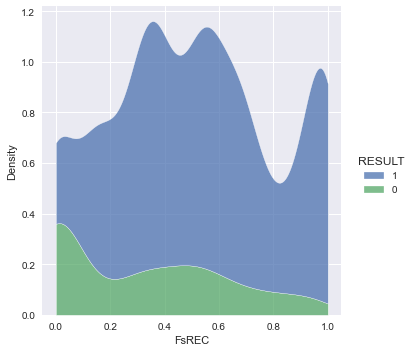

In [16]:
sns.displot(df, x='FsREC', kind='kde', hue='RESULT',
            bw_adjust=.5, multiple='stack', fill=True, cut=0)

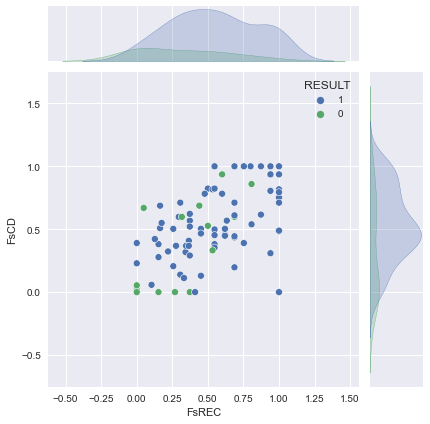

In [17]:
sns.jointplot(data=df, x="FsREC", y="FsCD", hue="RESULT")

FsCD  FsLEG  FsREC  FsS_INC  FsT_INC  TEC RESULT  Unnamed: 7
0  0.04   0.20   0.00     0.15     0.25 0.00      1         NaN
1  0.14   0.53   0.31     0.50     0.25 0.00      1         NaN
2  0.32   0.30   0.34     0.50     0.25 1.00      1         NaN
3  0.54   1.00   0.81     1.00     0.38 0.00      1         NaN
4  0.81   1.00   0.94     0.50     0.38 0.00      1         NaN

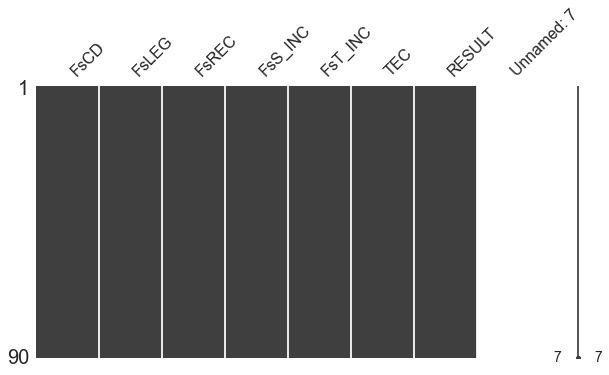

In [18]:
#plot missing data
mi.matrix(df, figsize = (10,5));
df.head(5)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pd.options.plotting.backend = "plotly"

y = np.ravel(df[outputs])
X = df[inputs]

X.head(5)

FsCD  FsLEG  FsREC  FsS_INC  FsT_INC  TEC
0  0.04   0.20   0.00     0.15     0.25 0.00
1  0.14   0.53   0.31     0.50     0.25 0.00
2  0.32   0.30   0.34     0.50     0.25 1.00
3  0.54   1.00   0.81     1.00     0.38 0.00
4  0.81   1.00   0.94     0.50     0.38 0.00

In [21]:
#which technique of estimation // Classifier selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=3, learning_rate=0.01,
    max_depth=2, random_state=1).fit(X_train, y_train)
clf.score(X_test, y_test)
#clf

0.8888888888888888

In [23]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence

rng = np.random.RandomState(0)

clf = RandomForestClassifier(n_estimators=10, random_state=rng)

param_dist = {"max_depth": [1, 7],
              "max_features": randint(1, 7),
              "min_samples_split": randint(1, 15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rsh = HalvingRandomSearchCV(estimator=clf, param_distributions=param_dist,
                            factor=2, random_state=rng)
rsh.fit(X, y)
rsh.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'min_samples_split': 9}

0.8125


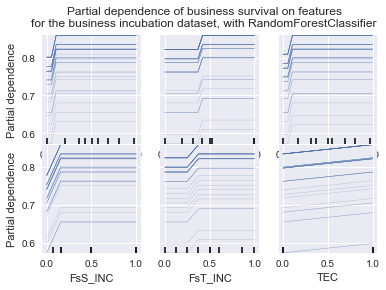

In [24]:
print(rsh.best_score_)

features = inputs
display = plot_partial_dependence(
       rsh, X, features, kind="individual", subsample=50,
       n_jobs=3, grid_resolution=20, random_state=0
)
display.figure_.suptitle(
    'Partial dependence of business survival on features\n'
    'for the business incubation dataset, with RandomForestClassifier'
)
display.figure_.subplots_adjust(hspace=0.01)

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import PolynomialCountSketch

linear_baseline = make_pipeline(MinMaxScaler(),
                                LogisticRegression(max_iter=1000))

linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.7777777777777778

In [50]:
pipe = make_pipeline(MinMaxScaler(),
                     PolynomialCountSketch(degree=2, n_components=10),
                     LogisticRegression(solver='saga', max_iter=10000))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60,
                                                    test_size=30,
                                                    random_state=42)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.8

In [55]:
from uq360.utils.misc import make_sklearn_compatible_scorer

sklearn_aurrrc = make_sklearn_compatible_scorer(task_type="classification", metric="aurrrc", greater_is_better=False)
sklearn_ece = make_sklearn_compatible_scorer(task_type="classification", metric="ece", greater_is_better=False)

import lale
from lale.lib.lale import Hyperopt
from lale.lib.sklearn import AdaBoostClassifier as Model
from sklearn.metrics import classification_report

lale.wrap_imported_operators()

y = np.ravel(df[outputs])
X = df[inputs]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_ece = Hyperopt(estimator=Model, cv=3, max_evals=20, scoring=sklearn_ece, verbose=True)
trained_with_ece = clf_ece.fit(X_train, y_train)

100%|██████████| 20/20 [00:21<00:00,  1.05s/trial, best loss: 0.5406696496586535]


In [56]:
print(classification_report(y_test, trained_with_ece.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.92      0.92      0.92        25

    accuracy                           0.87        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.87      0.87      0.87        30



In [57]:
clf_accuracy = Hyperopt(estimator=Model, cv=3, max_evals=20, verbose=True)
trained_with_accuracy = clf_accuracy.fit(X_train, y_train)

100%|██████████| 20/20 [00:21<00:00,  1.07s/trial, best loss: -0.7833333333333333]


In [58]:
print(classification_report(y_test, trained_with_accuracy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.89      0.96      0.92        25

    accuracy                           0.87        30
   macro avg       0.78      0.68      0.71        30
weighted avg       0.85      0.87      0.85        30



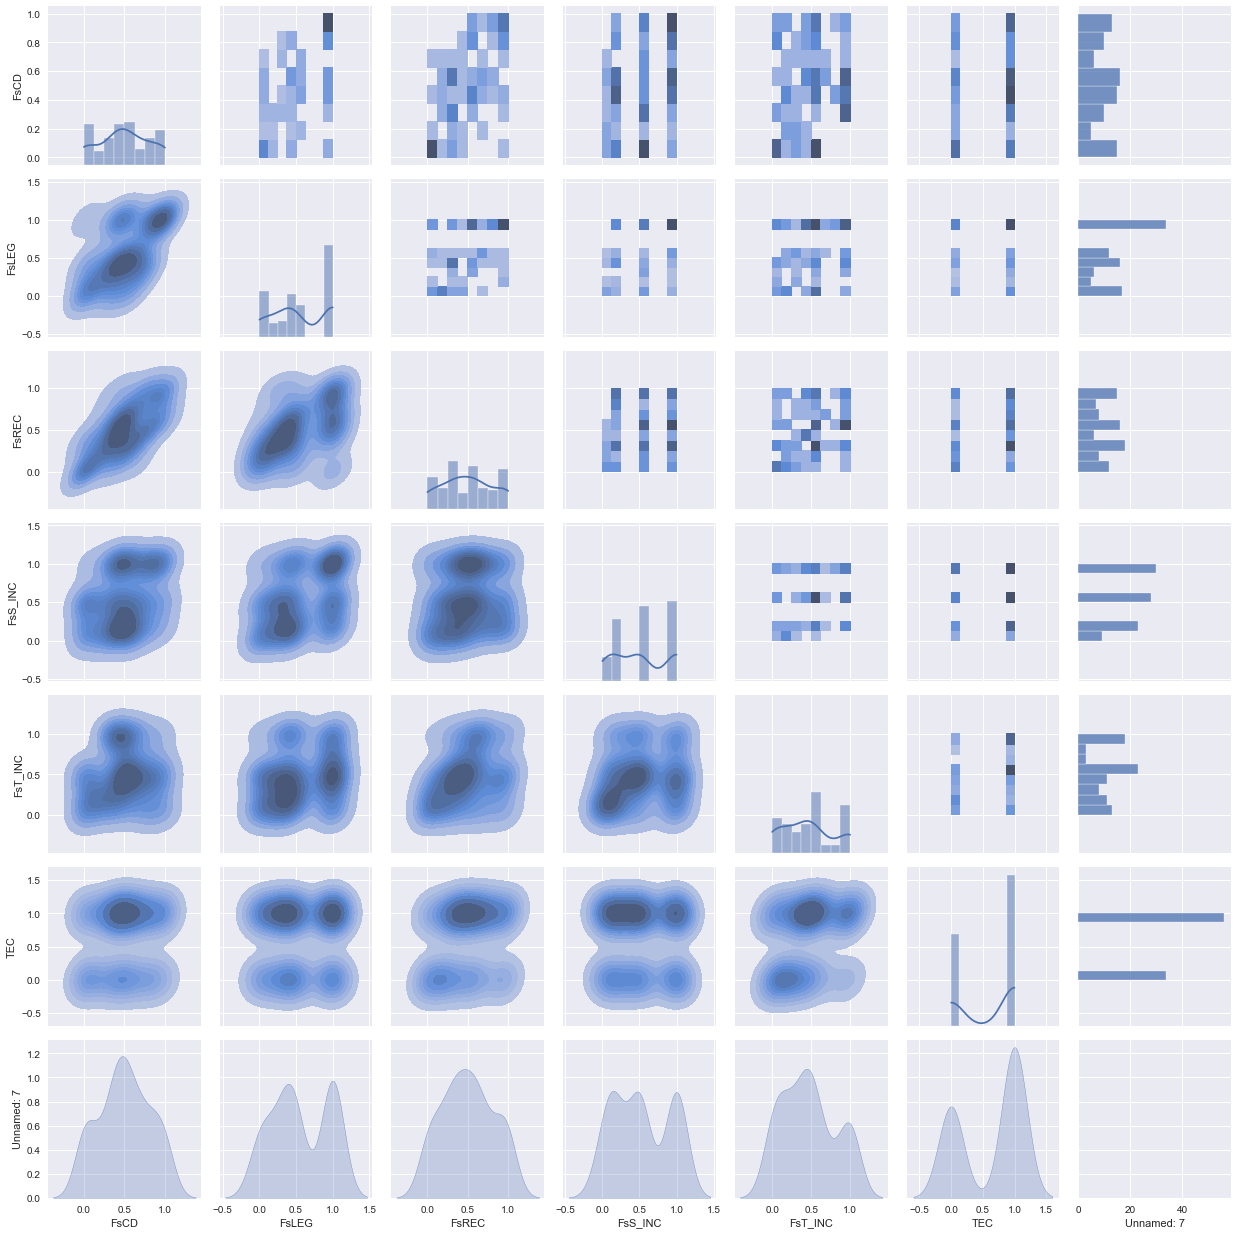

In [59]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Target looks like classification
Linear Discriminant Analysis training set score: 0.625


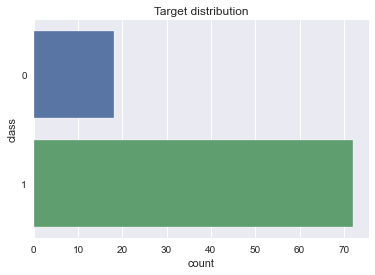

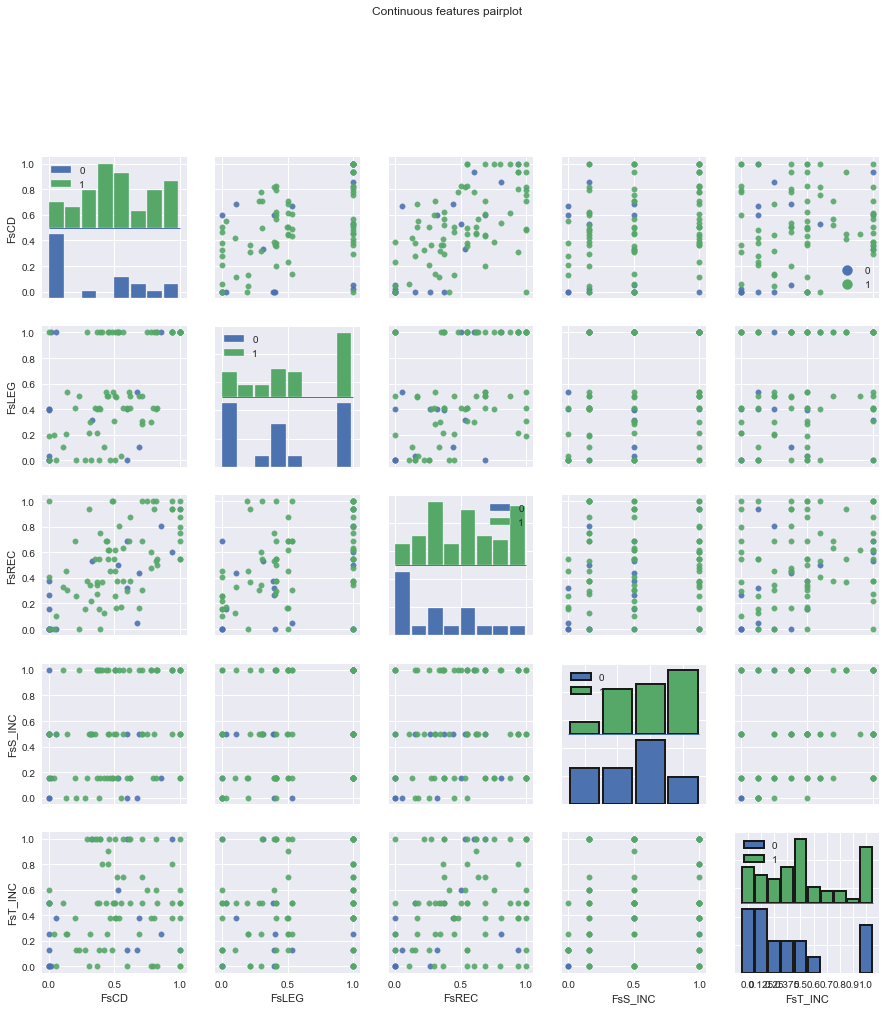

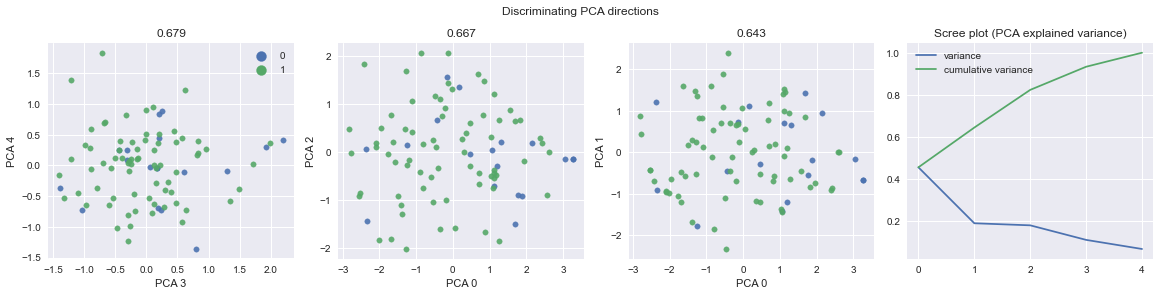

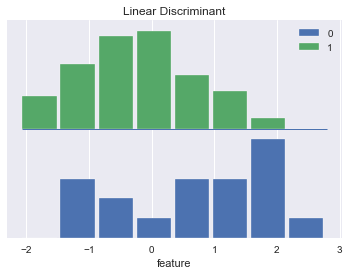

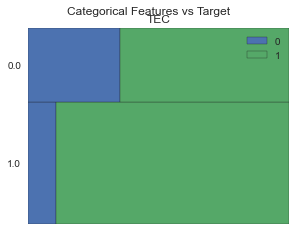

In [60]:
dabl.plot(df, target_col='RESULT')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

y = np.ravel(df[outputs])
X = df[inputs]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Calling the model
sc = dabl.SimpleClassifier().fit(X_train, y_train)
# Evaluating accuracy score
print("Accuracy score", sc.score(X_test, y_test))

Running DummyClassifier()
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428

Running GaussianNB()
accuracy: 0.762 average_precision: 0.572 roc_auc: 0.703 recall_macro: 0.672 f1_macro: 0.661
=== new best GaussianNB() (using recall_macro):
accuracy: 0.762 average_precision: 0.572 roc_auc: 0.703 recall_macro: 0.672 f1_macro: 0.661

Running MultinomialNB()
accuracy: 0.747 average_precision: 0.589 roc_auc: 0.710 recall_macro: 0.500 f1_macro: 0.428
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.792 average_precision: 0.431 roc_auc: 0.660 recall_macro: 0.660 f1_macro: 0.654
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.763 average_precision: 0.515 roc_auc: 0.720 recall_macro: 0.695 f1_macro: 0.683
=== new best DecisionTreeClassifier(class_we

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      0.82      0.90        22

    accuracy                           0.83        23
   macro avg       0.60      0.91      0.62        23
weighted avg       0.97      0.83      0.88        23

[[ 1  0]
 [ 4 18]]
Depth: 8
Number of leaves: 13
Computing partial dependence plots...


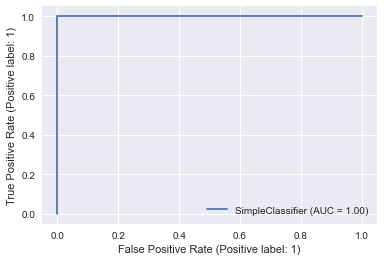

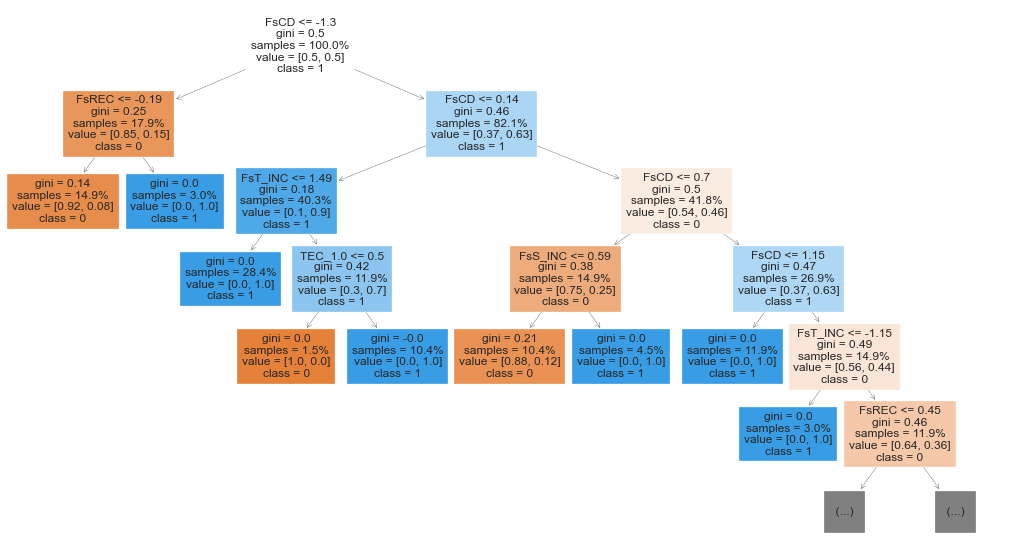

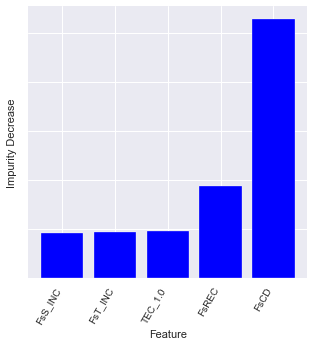

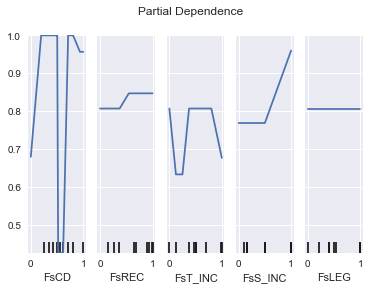

In [62]:
from dabl.models import SimpleClassifier
from dabl.explain import explain

explain(sc, X_test, y_test)

In [68]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Ys = outputs
Xs = inputs
YXs = []

t_size = 0.15 # test size

for k in combinations(Ys, 1):
    Y = np.ravel(df[df.columns.intersection(k)])
    for j in range(1, len(Xs)+1):
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(criterion="gini",
                                                                                         max_depth=1,
                                                                                         min_samples_split=9,
                                                                                         n_estimators=3,
                                                                                         random_state=rng,
                                                                                         bootstrap=True
                                                                                        ),
                                 verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'GBC', '# of variables:', j, score)
            YXs.append([k, X.columns, 'RFC', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier(
                                                                    #n_estimators=3,
                                                                    #learning_rate=0.01,
                                                                   # max_depth=2,
                                                                   # random_state=1),
                                                                    ),
                                 verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'GBC', '# of variables:', j, score)
            YXs.append([k, X.columns, 'GBC', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            if score > 0.90:
                best_pipeline = pipe
            YXs.append([k, X.columns.values, 'LR', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), SVC(kernel="rbf", C=0.01), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            YXs.append([k, X.columns.values, 'SVC', j, score])
results = pd.DataFrame(data=YXs, columns=['Y', 'FEATS', 'MODEL', 'number_FEATS', 'SCORE'])
results.dtypes
print(results.describe())

       number_FEATS  SCORE
count        252.00 252.00
mean           3.05   0.84
std            1.18   0.09
min            1.00   0.50
25%            2.00   0.79
50%            3.00   0.86
75%            4.00   0.93
max            6.00   0.93


In [69]:
print(results.head)

<bound method NDFrame.head of              Y                                              FEATS MODEL  \
0    (RESULT,)                    Index(['FsCD'], dtype='object')   RFC   
1    (RESULT,)                   Index(['FsLEG'], dtype='object')   RFC   
2    (RESULT,)                   Index(['FsREC'], dtype='object')   RFC   
3    (RESULT,)                 Index(['FsS_INC'], dtype='object')   RFC   
4    (RESULT,)                 Index(['FsT_INC'], dtype='object')   RFC   
..         ...                                                ...   ...   
247  (RESULT,)              [FsLEG, FsREC, FsS_INC, FsT_INC, TEC]   SVC   
248  (RESULT,)  Index(['FsCD', 'FsLEG', 'FsREC', 'FsS_INC', 'F...   RFC   
249  (RESULT,)  Index(['FsCD', 'FsLEG', 'FsREC', 'FsS_INC', 'F...   GBC   
250  (RESULT,)        [FsCD, FsLEG, FsREC, FsS_INC, FsT_INC, TEC]    LR   
251  (RESULT,)        [FsCD, FsLEG, FsREC, FsS_INC, FsT_INC, TEC]   SVC   

     number_FEATS  SCORE  
0               1   0.79  
1              

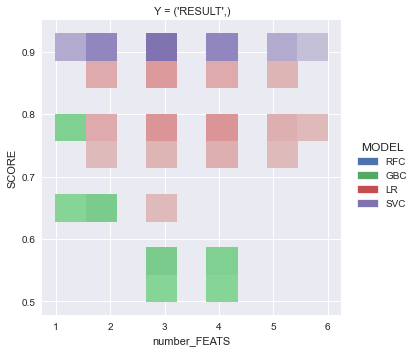

In [70]:
sns.displot(results, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

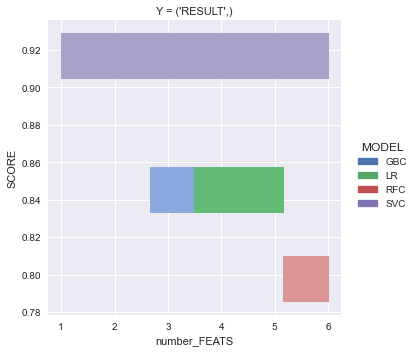

In [71]:
#filtering only with the max score in each combination of Y and Model type
g = results.loc[results.groupby(["Y", "MODEL", 'number_FEATS'])["SCORE"].idxmax()]
g.to_clipboard(sep='\t')
#print(g)
sns.displot(g, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

In [73]:
selected = results[(results["number_FEATS"]>=1) & (results["SCORE"] >= 0.92)]

print(selected)

             Y                                        FEATS MODEL  \
1    (RESULT,)             Index(['FsLEG'], dtype='object')   RFC   
3    (RESULT,)           Index(['FsS_INC'], dtype='object')   RFC   
4    (RESULT,)           Index(['FsT_INC'], dtype='object')   RFC   
5    (RESULT,)               Index(['TEC'], dtype='object')   RFC   
7    (RESULT,)             Index(['FsLEG'], dtype='object')   GBC   
..         ...                                          ...   ...   
244  (RESULT,)           [FsCD, FsLEG, FsREC, FsT_INC, TEC]   SVC   
245  (RESULT,)         [FsCD, FsLEG, FsS_INC, FsT_INC, TEC]   SVC   
246  (RESULT,)         [FsCD, FsREC, FsS_INC, FsT_INC, TEC]   SVC   
247  (RESULT,)        [FsLEG, FsREC, FsS_INC, FsT_INC, TEC]   SVC   
251  (RESULT,)  [FsCD, FsLEG, FsREC, FsS_INC, FsT_INC, TEC]   SVC   

     number_FEATS  SCORE  
1               1   0.93  
3               1   0.93  
4               1   0.93  
5               1   0.93  
7               1   0.93  
..       

In [74]:
best_pipeline.n_features_in_

6

In [75]:
best_pipeline.steps

[('standardscaler', StandardScaler(with_mean=False)), ('svc', SVC(C=0.01))]

In [76]:
model = dabl.SimpleClassifier().fit(X_train, y_train)



Running DummyClassifier()
accuracy: 0.777 average_precision: 0.223 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.437
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.777 average_precision: 0.223 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.437

Running GaussianNB()
accuracy: 0.763 average_precision: 0.603 roc_auc: 0.715 recall_macro: 0.667 f1_macro: 0.641
=== new best GaussianNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.603 roc_auc: 0.715 recall_macro: 0.667 f1_macro: 0.641

Running MultinomialNB()
accuracy: 0.777 average_precision: 0.589 roc_auc: 0.738 recall_macro: 0.500 f1_macro: 0.437
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.843 average_precision: 0.551 roc_auc: 0.717 recall_macro: 0.717 f1_macro: 0.725
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.843 average_precision: 0.551 roc_auc: 0.717 recall_macro: 0.717 f1_macro: 0.725

Running Decision

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.85      0.88        13

    accuracy                           0.79        14
   macro avg       0.46      0.42      0.44        14
weighted avg       0.85      0.79      0.82        14

[[ 0  1]
 [ 2 11]]
Depth: 1
Number of leaves: 2
Computing partial dependence plots...


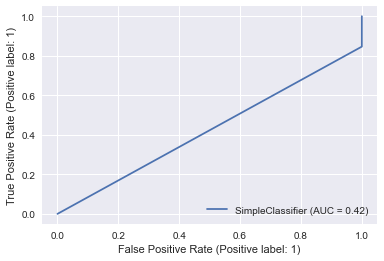

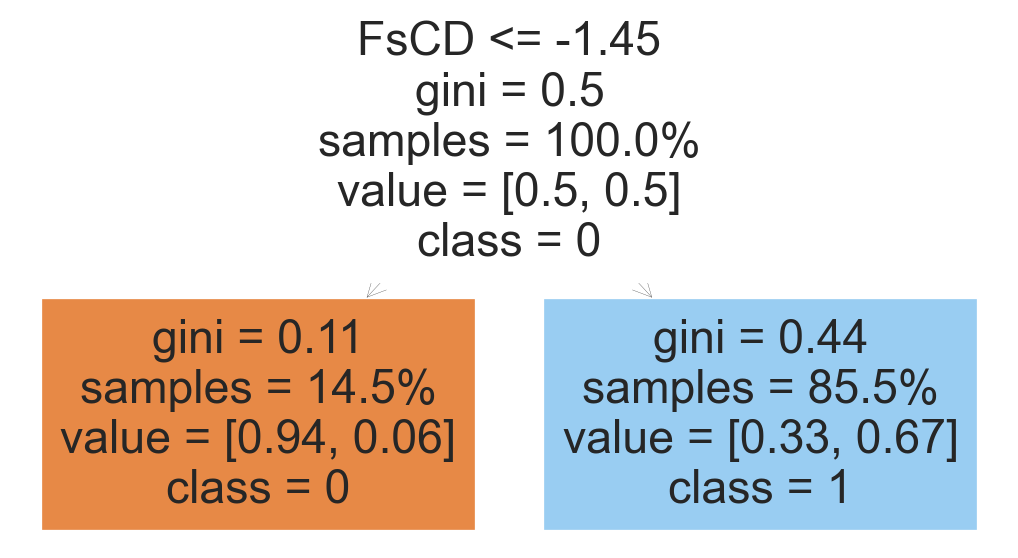

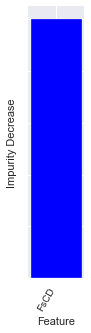

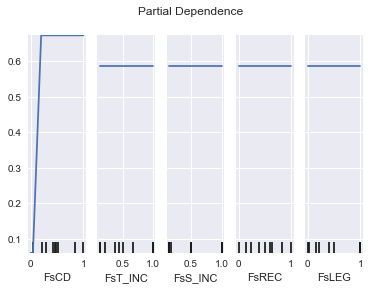

In [80]:
from dabl.explain import explain
explain(model, X_test, y_test)

Automatically created module for IPython interactive environment


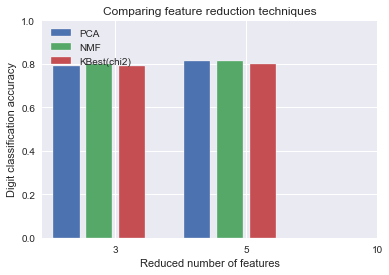

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=True, max_iter=10000))
])

N_FEATURES_OPTIONS = [3, 5, 10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)

X = df[list(inputs)]
y = df.RESULT

grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

plt.show()

In [82]:
import plotly_express as px
fig = px.bar(results, x='number_FEATS', y='SCORE', color='MODEL', hover_name='FEATS')
fig.show()

In [83]:
# Importance of attribute with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(X.columns)
print(model.feature_importances_)

Index(['FsCD', 'FsLEG', 'FsREC', 'FsS_INC', 'FsT_INC', 'TEC'], dtype='object')
[0.27519707 0.15004749 0.22533973 0.11152419 0.14604337 0.09184815]


In [84]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Predictor Variables:", X)
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables:     FsCD  FsLEG  FsREC  FsS_INC  FsT_INC  TEC
0   0.04   0.20   0.00     0.15     0.25 0.00
1   0.14   0.53   0.31     0.50     0.25 0.00
2   0.32   0.30   0.34     0.50     0.25 1.00
3   0.54   1.00   0.81     1.00     0.38 0.00
4   0.81   1.00   0.94     0.50     0.38 0.00
..   ...    ...    ...      ...      ...  ...
85  0.45   1.00   0.55     1.00     0.80 0.00
86  0.50   0.00   0.26     1.00     0.50 0.00
87  1.00   1.00   0.69     0.50     0.00 1.00
88  0.49   0.53   1.00     0.15     0.50 1.00
89  0.33   0.32   0.53     0.50     1.00 0.00

[90 rows x 6 columns]
Selected Variables: [ True False  True  True False  True]
Attribute Ranking: [1 3 1 1 2 1]
Number of Best Attributes: 4


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[ 1  0]
 [ 0 13]]
Computing partial dependence plots...


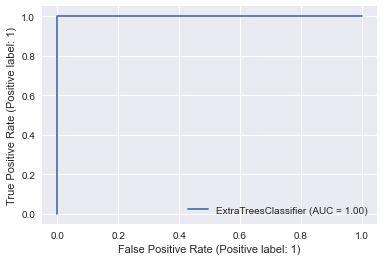

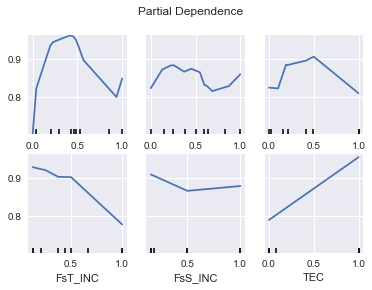

In [86]:
explain(model, X_test, y_test)

Automatically created module for IPython interactive environment


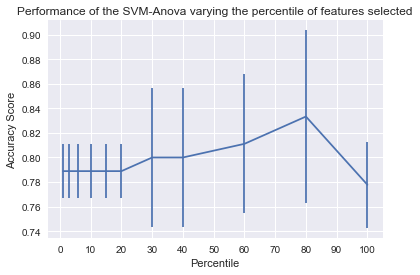

In [87]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
#X, y = load_iris(return_X_y=True)
columns = inputs
X = df[inputs]
y = df.RESULT

# Add non-informative features
np.random.seed(0)
#X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()